In [1]:
# import necessary libraries

import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## Preprocess Data

In [2]:
# load dataset

df = pd.read_csv('data/3500_BA_Reviews_Cleaned_Dropped.csv')
df

,Review_Details;;
0,"""The worst business class experience. Ground c..."
1,"""Quite possibly the worst business class I hav..."
2,"""I will never be flying with BA again. This is..."
3,"""On the my trip to Mexico City, I had the oppo..."
4,"""I upgraded at check in to Club Europe seat 1D..."
...,...
3495,"""Flew SYD-SIN and had a reasonably comfortable..."
3496,"""Madrid-London on 9 September on Boeing 767 ai..."
3497,"""9/8/14 LHR-EWR in WC. Clean aircraft but mode..."
3498,"""Flew London City to Malaga return 28th August..."


In [3]:
data = df.rename(columns={"Review_Details;;": "Reviews"})
data

,Reviews
0,"""The worst business class experience. Ground c..."
1,"""Quite possibly the worst business class I hav..."
2,"""I will never be flying with BA again. This is..."
3,"""On the my trip to Mexico City, I had the oppo..."
4,"""I upgraded at check in to Club Europe seat 1D..."
...,...
3495,"""Flew SYD-SIN and had a reasonably comfortable..."
3496,"""Madrid-London on 9 September on Boeing 767 ai..."
3497,"""9/8/14 LHR-EWR in WC. Clean aircraft but mode..."
3498,"""Flew London City to Malaga return 28th August..."


### Tokenize, remove stopwords and lemmatize

In [4]:
# create a function for preprocessing the review text
def preprocess_text(data):
    
    # Tokenize text
    tokens = word_tokenize(data.lower()) # returns the tokenized words in lower case
    
    # Remove stop words e.g: 'is', 'the', 'and', 'of'...
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Lemmatize the tokens i.e: cut down words to their roots
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    
    # Return lemmatized filtered tokens 
    return processed_text

# Replace the Reviews in the dataset with the lemmatized filtered tokens
# by applying the preprocess_text function to the column 'Review'
data['Reviews'] = data['Reviews'].apply(preprocess_text)
data

,Reviews
0,`` worst business class experience . ground cr...
1,`` quite possibly worst business class ever fl...
2,`` never flying ba . first last . flying singa...
3,"`` trip mexico city , opportunity experience b..."
4,`` upgraded check club europe seat 1d excellen...
...,...
3495,`` flew syd-sin reasonably comfortable trip . ...
3496,`` madrid-london 9 september boeing 767 aircra...
3497,`` 9/8/14 lhr-ewr wc . clean aircraft moderate...
3498,`` flew london city malaga return 28th august ...


## Analyze Sentiment
### NLTK Sentiment Analyzer

In [5]:
# Initialize NLTK Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Define get_sentiment function which grades sentiment scores
# the scores are checked by the the polarity_scores method
# if greater than 0.2, sentiment = 1, that is positive
# if less than 0.19, sentiment = -1, that is negative
# if greater than 0.19 and less than 0.2, sentiment = 0, that is neutral

def get_sentiment(data):
    scores = analyzer.polarity_scores(data)
    
    if scores['pos'] > 0.2:
        sentiment = 1
    elif scores['pos'] < 0.19:
        sentiment = -1
    else:
        sentiment = 0
    return sentiment

# create new column for sentiment in the dataset and apply sentiment
data['Sentiment'] = data['Reviews'].apply(get_sentiment)
data

,Reviews,Sentiment
0,`` worst business class experience . ground cr...,-1
1,`` quite possibly worst business class ever fl...,-1
2,`` never flying ba . first last . flying singa...,-1
3,"`` trip mexico city , opportunity experience b...",1
4,`` upgraded check club europe seat 1d excellen...,1
...,...,...
3495,`` flew syd-sin reasonably comfortable trip . ...,1
3496,`` madrid-london 9 september boeing 767 aircra...,1
3497,`` 9/8/14 lhr-ewr wc . clean aircraft moderate...,-1
3498,`` flew london city malaga return 28th august ...,1


In [6]:
data['Sentiment_Type'] = data['Sentiment'].apply(
    lambda score: 'Positive' if score == 1 else ('Negative' if score == -1 else 'Neutral')
    )
data

,Reviews,Sentiment,Sentiment_Type
0,`` worst business class experience . ground cr...,-1,Negative
1,`` quite possibly worst business class ever fl...,-1,Negative
2,`` never flying ba . first last . flying singa...,-1,Negative
3,"`` trip mexico city , opportunity experience b...",1,Positive
4,`` upgraded check club europe seat 1d excellen...,1,Positive
...,...,...,...
3495,`` flew syd-sin reasonably comfortable trip . ...,1,Positive
3496,`` madrid-london 9 september boeing 767 aircra...,1,Positive
3497,`` 9/8/14 lhr-ewr wc . clean aircraft moderate...,-1,Negative
3498,`` flew london city malaga return 28th august ...,1,Positive


In [7]:
data.iloc[69]

Reviews           `` angry , disappointed , unsatisfied . route ...
Sentiment                                                        -1
Sentiment_Type                                             Negative
Name: 69, dtype: object

In [8]:
# save to csv file
data.to_csv('data/sentiment.csv')

## Data Visualization

In [9]:
import matplotlib.pyplot as plt
import numpy as np

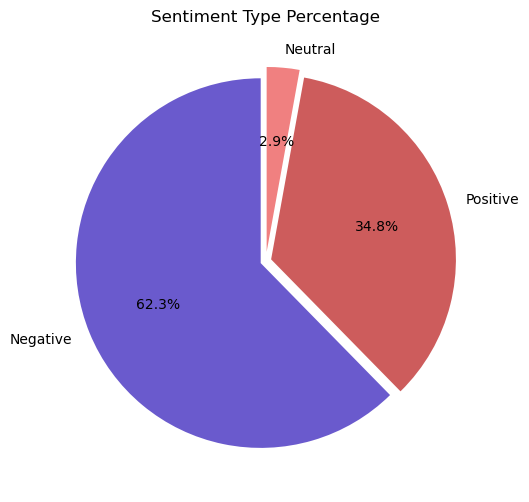

In [228]:
# Show the percentage of sentiment types
data_Per = data['Sentiment_Type'].value_counts(normalize=True)*100

# Create explode data
explode = (0.03, 0.03, 0.05)

# Create colors
colors = ("slateblue", "indianred", "lightcoral")

# Set border width and color
wedgeprops = {'linewidth': 0, 'edgecolor': None}

# Show the percentage on chart as String
autopct = '%1.1f%%'

# Represent in a pie chart
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data_Per,
       autopct = autopct,
       explode = explode,
       labels = data_Per.index,
       colors = colors,
       startangle = 90,
       wedgeprops = wedgeprops,
       textprops = dict(color = "black"))

# Set title of Pie Chart
ax.set_title("Sentiment Type Percentage")

plt.savefig("Pie_Sent_perct.png")

# Show plot
plt.show()

### Frequency analysis of words

In [11]:
import re

# Remove unwanted symbols
data.replace(re.compile(r'\"'), "", inplace=True)
data.replace(re.compile(r'\s*\"\s*'), "", inplace=True)
data

,Reviews,Sentiment,Sentiment_Type
0,`` worst business class experience . ground cr...,-1,Negative
1,`` quite possibly worst business class ever fl...,-1,Negative
2,`` never flying ba . first last . flying singa...,-1,Negative
3,"`` trip mexico city , opportunity experience b...",1,Positive
4,`` upgraded check club europe seat 1d excellen...,1,Positive
...,...,...,...
3495,`` flew syd-sin reasonably comfortable trip . ...,1,Positive
3496,`` madrid-london 9 september boeing 767 aircra...,1,Positive
3497,`` 9/8/14 lhr-ewr wc . clean aircraft moderate...,-1,Negative
3498,`` flew london city malaga return 28th august ...,1,Positive


In [16]:
# module for counting and regex
from collections import Counter

# Using the reviews from our dataset
reviews  =data['Reviews']

# Split reviews into words to treat them individually
words = []
for review in reviews:
    words.extend(review.split())
    
# Get keywords by removing stopwords
keywords = [word for word in words if word not in stopwords.words('english') and word not in ['I', 'The','would','one','get',
                                                                                              'We', 'They', 'could', '.', ';', '-',
                                                                                              '(', ')', 'n\'t', ',', '``', '\'s']]

# Get the top 20 keywords using Counter() and most_common() methods
top_words = Counter(keywords).most_common(20)


In [17]:
top_words

[('flight', 7427),
 ('ba', 4565),
 ('seat', 4225),
 ('service', 2836),
 ('time', 2290),
 ('food', 2167),
 ('british', 2155),
 ('airway', 2147),
 ('london', 2116),
 ('crew', 2054),
 ('good', 1928),
 ('cabin', 1922),
 ('class', 1863),
 ('hour', 1767),
 ('airline', 1734),
 ('business', 1540),
 ('staff', 1500),
 ('heathrow', 1481),
 ('economy', 1361),
 ('passenger', 1264)]

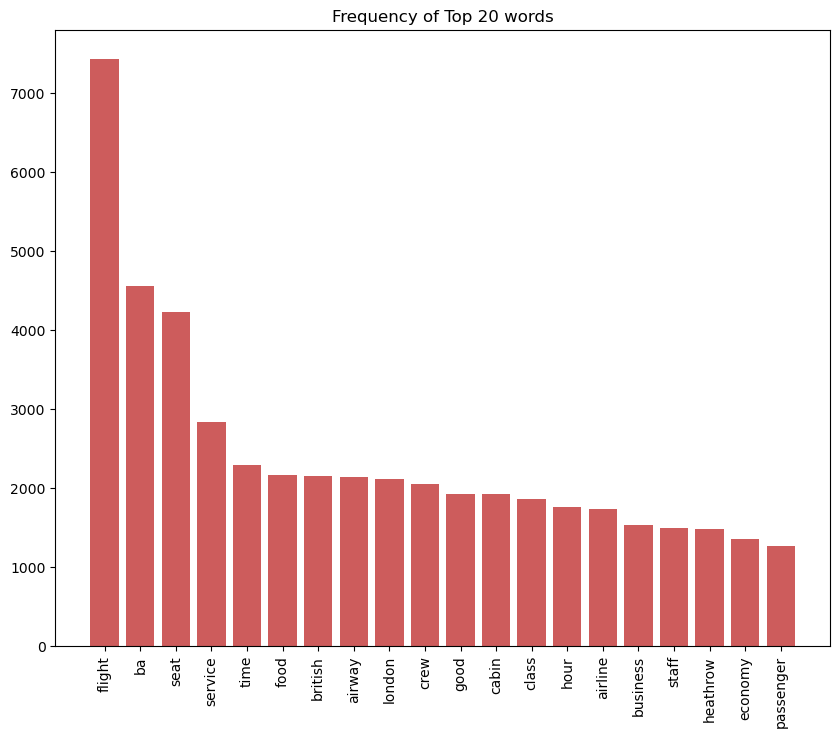

In [232]:
# Define labels and values
labels, values = zip(*top_words)

# Represent in a bar chart
fig = plt.figure(figsize = (10,8))

# Plot the bars
plt.bar(labels, values, color = 'indianred')

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)
plt.title("Frequency of Top 20 words")
plt.savefig("Hist_Word_freq.png")

# Show plot
plt.show()

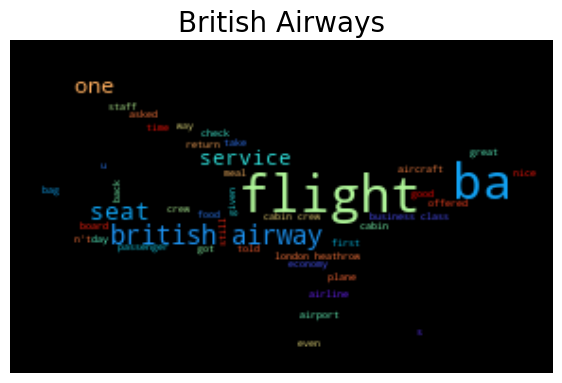

In [230]:
# Use word cloud for frequency analysis
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Set wordcloud image mask
mask = np.array(Image.open(r'BA8.jpeg'))

# Set wordcloud parameters
wordCloud = WordCloud(stopwords = STOPWORDS,
                      mask = mask,
                      colormap = 'rainbow',
                      background_color = "black",
                      random_state=42,
                      width = mask.shape[1],
                      height = mask.shape[0])

# Generate wordcloud
wordCloud.generate(' '.join(data['Reviews']))

title = 'British Airways'

# Show wordCloud
fig = plt.figure(figsize = (7,5))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis("off")
plt.title(title, fontsize=20)
plt.savefig("Wordcloud.png")
plt.show()

### Top Word Occurrence Analysis
### Using Stacked bar chart 
#### Find how many times a word appeared in different sentiment types

In [172]:
data

,Reviews,Sentiment,Sentiment_Type
0,`` worst business class experience . ground cr...,-1,Negative
1,`` quite possibly worst business class ever fl...,-1,Negative
2,`` never flying ba . first last . flying singa...,-1,Negative
3,"`` trip mexico city , opportunity experience b...",1,Positive
4,`` upgraded check club europe seat 1d excellen...,1,Positive
...,...,...,...
3495,`` flew syd-sin reasonably comfortable trip . ...,1,Positive
3496,`` madrid-london 9 september boeing 767 aircra...,1,Positive
3497,`` 9/8/14 lhr-ewr wc . clean aircraft moderate...,-1,Negative
3498,`` flew london city malaga return 28th august ...,1,Positive


In [174]:
# Initialize counters for positive, negative, and neutral sentiments
pos = {}
neg = {}
neu = {}

# Iterate over each review
for review, sentiment in zip(data['Reviews'], data['Sentiment_Type']):
    # slit the reviews into words
    words = review.split()
    for word in words:
        if word in pos.keys():
            if sentiment == 'Positive':
                pos[word] += 1
            elif sentiment == 'Negative':
                neg[word] += 1
            elif sentiment == 'Neutral':
                neu[word] += 1
        else:
            if sentiment == 'Positive':
                pos[word] = 1
                neg[word] = 0
                neu[word] = 0
            elif sentiment == 'Negative':
                pos[word] = 0
                neg[word] = 1
                neu[word] = 0
            elif sentiment == 'Neutral':
                pos[word] = 0
                neg[word] = 0
                neu[word] = 1

#### Stacked bar chart

In [173]:
word_freq = top_words
print(word_freq)

[('flight', 7427), ('ba', 4565), ('seat', 4225), ('service', 2836), ('time', 2290), ('food', 2167), ('british', 2155), ('airway', 2147), ('london', 2116), ('crew', 2054), ('good', 1928), ('cabin', 1922), ('class', 1863), ('hour', 1767), ('airline', 1734), ('business', 1540), ('staff', 1500), ('heathrow', 1481), ('economy', 1361), ('passenger', 1264)]


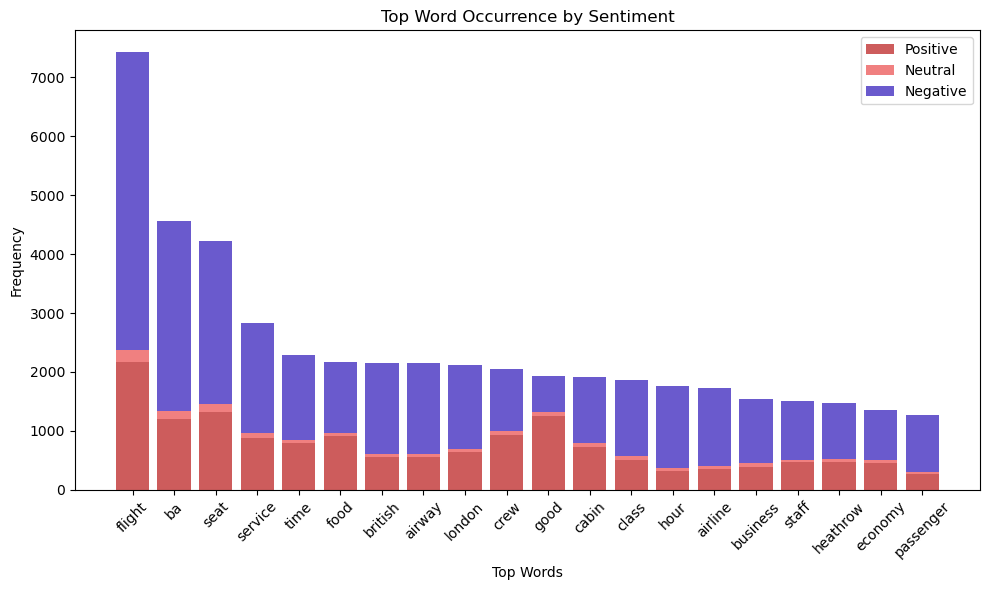

In [231]:
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10,6))
words_from_tuple = [word for word, freq in word_freq]
pos_val = [pos.get(word, 0) for word in words_from_tuple]
neg_val = [neg.get(word, 0) for word in words_from_tuple]
neu_val = [neu.get(word, 0) for word in words_from_tuple]

ax.bar(words_from_tuple, pos_val, label='Positive', color='indianred')
ax.bar(words_from_tuple, neu_val, bottom=pos_val, label='Neutral', color='lightcoral')
ax.bar(words_from_tuple, neg_val, bottom=[p + n for p, n in zip(pos_val, neu_val)], label='Negative', color='slateblue')
ax.set_ylabel('Frequency')
ax.set_xlabel('Top Words')
ax.set_title('Top Word Occurrence by Sentiment')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Word_Sent_freq.png")
plt.show()

#### Nested pie chart

In [176]:
# create data
# using our topwords, we get x data, 
# which is the first element in our tuple list
unzipped = list(zip(*top_words))
x = list(unzipped[0])
print(x)

['flight', 'ba', 'seat', 'service', 'time', 'food', 'british', 'airway', 'london', 'crew', 'good', 'cabin', 'class', 'hour', 'airline', 'business', 'staff', 'heathrow', 'economy', 'passenger']


In [177]:
y = list(unzipped[1])
print(y)

[7427, 4565, 4225, 2836, 2290, 2167, 2155, 2147, 2116, 2054, 1928, 1922, 1863, 1767, 1734, 1540, 1500, 1481, 1361, 1264]


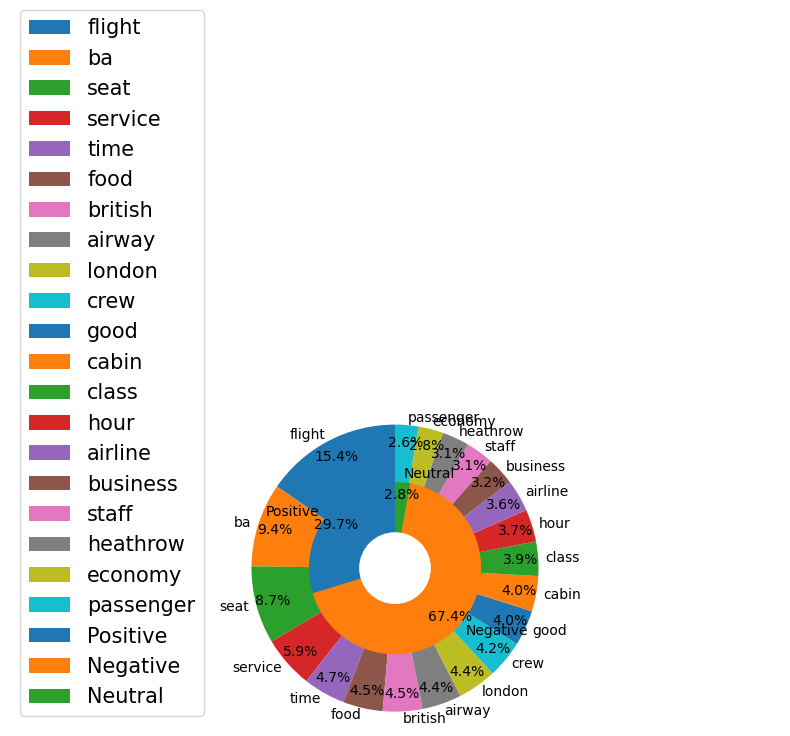

In [224]:
# Setting the size of the figure
plt.figure(figsize=(8,6))
sentiments = ['Positive', 'Negative', 'Neutral']
colors = ['indianred', 'slateblue', 'lightcoral']
pos_sum = sum(pos.values())
neg_sum = sum(neg.values())
neu_sum = sum(neu.values())

plt.pie(y, labels = x, startangle = 90, pctdistance = 0.88, autopct = '%1.1f%%', radius=1.0, labeldistance=1.05)

plt.pie([pos_sum, neg_sum, neu_sum], labels = sentiments, startangle = 90, pctdistance = 0.85, autopct = '%1.1f%%', radius=0.60)

# Creating the donut shape for the pie
centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle) # adding the centre circle

# Plotting the pie 
plt.axis('equal')  # equal aspect ratio
plt.legend( loc=3, fontsize =15)
ax.set_title('Top Word Occurrence by Sentiment')
plt.tight_layout()
plt.show()

In [180]:
pie_data = pd.DataFrame()
sentiments = ['Positive', 'Negative', 'Neutral']
print(pos_sum)
print(pos_val)

111407
[2172, 1195, 1319, 882, 792, 905, 561, 554, 646, 931, 1248, 730, 508, 326, 361, 394, 467, 474, 452, 267]


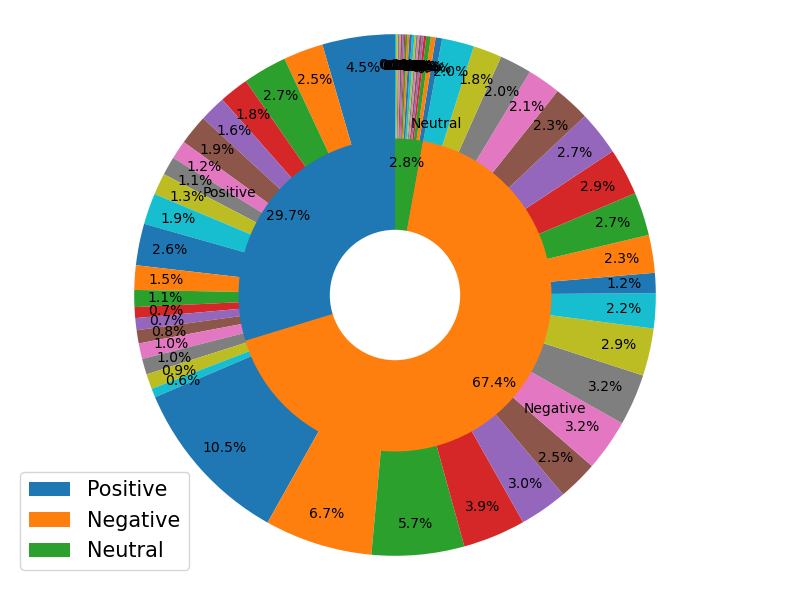

In [227]:
# Setting the size of the figure
plt.figure(figsize=(8,6))
sentiments = ['Positive', 'Negative', 'Neutral']
colors = ['indianred', 'slateblue', 'lightcoral']
pos_sum = sum(pos.values())
neg_sum = sum(neg.values())
neu_sum = sum(neu.values())

out_expl = 

plt.pie(sum([pos_val, neg_val, neu_val],[]), startangle = 90, pctdistance = 0.88, autopct = '%1.1f%%', radius=1.0, labeldistance=1.05)

plt.pie([pos_sum, neg_sum, neu_sum], labels = sentiments, startangle = 90, pctdistance = 0.85, autopct = '%1.1f%%', radius=0.60)

# Creating the donut shape for the pie
centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle) # adding the centre circle

# Plotting the pie 
plt.axis('equal')  # equal aspect ratio
plt.legend( loc=3, fontsize =15)
ax.set_title('Top Word Occurrence by Sentiment')
plt.tight_layout()
plt.show()